# Hotel Booking Demand
## 17 April 2020
#### A learning project 
#### Hani Nguyen

### Objectives
- Explore hotel booking demand
- Build a model to predict booking possibility based on the 'previous_cancellation'.

### Attributes
- Numerical: 
    - 'lead_time': Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
    - 'arrival_date_year': Year of arrival date	
    - 'arrival_date_week_number': Week number of the arrival date
    - 'arrival_date_day_of_month': Day of the month of the arrival date
    - 'stays_in_weekend_nights': Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
    - 'stays_in_week_nights': Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.
    - 'adults': Number of adults	
    - 'children': Number of children	
    - 'babies': Number of babies	 
     - 'previous_cancellations': Number of previous bookings that were cancelled by the customer prior to the current booking.     
    - 'previous_bookings_not_canceled': Number of previous bookings not cancelled by the customer prior to the current booking .
     - 'booking_changes': Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation. 
    - 'days_in_waiting_list': Number of days the booking was in the waiting list before it was confirmed to the customer.
    - 'adr': Average Daily Rate
    - 'required_car_parking_spaces': Number of car parking spaces required by the customer.
    - 'total_of_special_requests': Number of special requests made by the customer (e.g. twin bed or high floor).
- Categorical:  
    - 'hotel': Resort or City Hotel
    - 'is_canceled': Value indicating if the booking was canceled (1) or not (0)
    - 'arrival_date_month': Month of arrival date with 12 categories: “January” to “December”.
    - 'meal': Type of meal booked. Categories are presented in standard hospitality meal packages:
        - Undefined/SC – no meal package;
        - BB – Bed & Breakfast;
        - HB – Half board (breakfast and one other meal – usually dinner);
        - FB – Full board (breakfast, lunch and dinner)
    - 'country': Country of origin. Categories are represented in the ISO 3155–3:2013 format.
    - 'market_segment': Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
    - 'distribution_channel': Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
    - 'is_repeated_guest': Value indicating if the booking name was from a repeated guest (1) or not (0)
    - 'reserved_room_type': Code of room type reserved. Code is presented instead of designation for anonymity reasons.
    - 'assigned_room_type': Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons. 
    - 'deposit_type': Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
        - No Deposit
        - Non Refund – a deposit was made in the value of the total stay cost;
        - Refundable – a deposit was made with a value under the total cost of stay.
    - 'agent': ID of the travel agency that made the booking
    - 'company': ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons. 
    - 'customer_type': Type of booking, assuming one of four categories:
        - Contract - when the booking has an allotment or other type of contract associated to it;
        - Group – when the booking is associated to a group;
        - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
        - Transient-party – when the booking is transient, but is associated to at least other transient booking
    - 'reservation_status': Reservation last status, assuming one of three categories:
        - Canceled – booking was canceled by the customer;
        - Check-Out – customer has checked in but already departed;
        - No-Show – customer did not check-in and did inform the hotel of the reason why
- Date: 'reservation_status_date': Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel
https://www.kaggle.com/prashanthsri12/hotel-demand-eda-basic
https://www.kaggle.com/vssseel/eda-various-ml-models-and-nn-with-roc-curves
https://www.kaggle.com/unzule/hotel-booking-analysis
https://www.kaggle.com/marcuswingen/eda-of-bookings-and-ml-to-predict-cancelations

In [3]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Step 1. Load data

Follow solution from https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d.
- https://towardsdatascience.com/predicting-hotel-cancellations-with-machine-learning-fa669f93e794

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

#machine learning libraries
from sklearn.preprocessing import LabelEncoder

In [2]:
#Load data
df = pd.read_csv(r"G:\Ninh\Language\Python\Hotel Booking Demand\hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
#Get general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


'adr' variable refers to the average price per night  of observation, so its values should not be lower than 0. We will deal with these values later on.

In [5]:
#unique values of categorical features
for col in df.columns:
    if df[col].dtype == 'object':
        print (col,":", df[col].unique(), "\n")

hotel : ['Resort Hotel' 'City Hotel'] 

arrival_date_month : ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June'] 

meal : ['BB' 'FB' 'HB' 'SC' 'Undefined'] 

country : ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' '

There are some categorical variables with 'Undefined' as unique values, such as meal, market_segment,distribution_channel variables. We will convert these 'Undefined' values to NaNs values.

##  Step 2. Preprocessing data

#### 2.1 Convert NULL/ Undefined values to np.nan 

In [4]:
#convert 'Undefined' and 'NULL' values to np.nan
for col in df.columns:
    if df[col].dtype == 'object':
        df[col][df[col].str.contains('Undefined', na =False)] = np.nan
        df[col][df[col].str.contains('NULL', na =False)] = np.nan

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [5]:
#print all null values of each column
df_null = df.isnull().sum()
print(df_null[df_null>0])

children                     4
meal                      1169
country                    488
market_segment               2
distribution_channel         5
agent                    16340
company                 112593
dtype: int64


#### 2.2 Handle missing data 

- We will delete the NULL values in 'market_segment', 'distribution_channel' variables since there are few NULL values in these fields. We will also delete NULL values in 'country' since we cannot impute them. 
- For NULL values in 'children', we will replace these values with 0, as the one who inputed these values might skip the answer when there are no children.

In [6]:
#drop NULL values
dropna = ['market_segment','distribution_channel','country']
df = df.dropna(subset = dropna)

In [7]:
#fill NaNs in children feature with 0
df['children']=df['children'].fillna(0)

In [8]:
#recheck unique values in variables with missing data
fill_na = ['meal','agent','company']
for col in fill_na:
    print (col,":", df[col].unique(), "\n")

meal : ['BB' 'FB' 'HB' 'SC' nan] 

agent : [ nan 304. 240. 303.  15. 241.   8. 250. 115.   5. 175. 134. 156. 243.
 242.   3. 105.  40. 147. 306. 184.  96.   2. 127.  95. 146.   9. 177.
   6. 143. 244. 149. 167. 300. 171. 305.  67. 196. 152. 142. 261. 104.
  36.  26.  29. 258. 110.  71. 181.  88. 251. 275.  69. 248. 208. 256.
 314. 126. 281. 273. 253. 185. 330. 334. 328. 326. 321. 324. 313.  38.
 155.  68. 335. 308. 332.  94. 348. 310. 339. 375.  66. 327. 387. 298.
  91. 245. 385. 257. 393. 168. 405. 249. 315.  75. 128. 307.  11. 436.
   1. 201. 183. 223. 368. 336. 291. 464. 411. 481.  10. 154. 468. 410.
 390. 440. 495. 492. 493. 434.  57. 531. 420. 483. 526. 472. 429.  16.
  34. 252. 270.  47. 114. 301. 193. 182. 135. 350. 195. 352. 355. 159.
 139. 363. 384. 360. 331. 367.  64.  78. 406. 163. 414. 333. 427. 431.
 430. 426. 438. 433. 418. 441. 282. 432.  72. 450. 180. 454. 455.  59.
 451. 254. 358. 469. 165. 467. 510. 337. 476. 502. 527. 479. 508. 535.
 302. 497. 187.  13.   7.  27.  14

- In 'meal' variable, 'Undefined' and 'SC' mean that there are no meal type. We previously changed the 'Undefined' to NULL, therefore, now we will fill the NULL values with 'SC'.
- For 'agent' and 'company' variables, NULL values mean that reservation did not made by any agency/ company, the customers might made the reservation by themselves. So we should not delete these values. Instead, we will replace these NULL values with a random value like 999.

In [9]:
#replace NULL values in 'meal' with 'SC'
df['meal'] = df['meal'].fillna('SC')

In [10]:
#replace NULL values in 'agent' and 'company' with 999
df['agent']= df['agent'].fillna(999)
df['company'] = df['company'].fillna(999)

In [11]:
#recheck NULL values
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

#### 2.3 Delete wrong values 

In [12]:
df['adr'].describe()

count    118897.000000
mean        102.003153
std          50.486065
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [12]:
(df['adr'] < 0).sum()

1

As shown above, all 'adr' values that are below 0 are not correct, and we should remove these observations.

In [13]:
df=df[df['adr']>0]

#### 2.4. Handle Date

In [14]:
def time_convert(date):
    return datetime.datetime.strptime(date, '%Y-%m-%d').date()

In [15]:
df['reservation_status_date'] = df['reservation_status_date'].apply(lambda date: time_convert(date))
df['reservation_status_date']

2         2015-07-02
3         2015-07-02
4         2015-07-03
5         2015-07-03
6         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 116958, dtype: object

In [16]:
#show final data
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,999.0,999.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,999.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,999.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,999.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,999.0,999.0,0,Transient,107.00,0,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,999.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,999.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,999.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,999.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


##  Step 3. Explore data

#### 3.1. Customer behavior of non-canceled guest

In [74]:
# Where do they come from?
non_canceled = df[df.is_canceled==0]
total_guests = len(non_canceled['country'])
guest_per = round((non_canceled.country.value_counts())/total_guests *100)
guest_per[guest_per==0].index.str.replace(guest_per[guest_per==0],'Others')

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [81]:
guest_per = guest_per.reset_index()
guest_per.country.rename('Percentage')

,index,country
0,PRT,27.0
1,GBR,13.0
2,FRA,12.0
3,ESP,9.0
4,DEU,8.0
...,...,...
160,TJK,0.0
161,BHR,0.0
162,ZMB,0.0
163,AIA,0.0


In [ ]:
fig,ax = plt.subplots(figsize=(5,10))
plt.pie(guest_per,autopct='%1.1f%%', startangle=90)
plt.tight_layout()
ax.legend(loc=3,labels=non_canceled.country.value_counts().index)
plt.show()

In [18]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#Where do guests come from?
# get number of acutal guests by country
country_data = pd.DataFrame(full_data_cln.loc[full_data_cln["is_canceled"] == 0]["country"].value_counts())
#country_data.index.name = "country"
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index
#country_data.loc[country_data["Guests in %"] < 2, "country"] = "Other"

# pie plot
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [ ]:
#Average price per guest
# normalize price per night (adr):
full_data_cln["adr_pp"] = full_data_cln["adr"] / (full_data_cln["adults"] + full_data_cln["children"])
full_data_guests = full_data_cln.loc[full_data_cln["is_canceled"] == 0] # only actual gusts
room_prices = full_data_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

In [ ]:
#Room Price per night and person over the year
# grab data:
room_prices_mothly = full_data_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

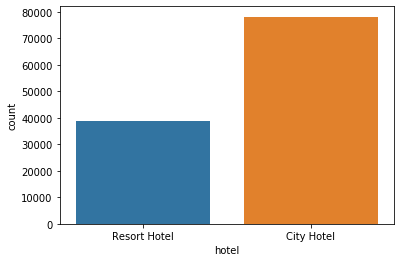

In [17]:
#Which hotel does the customers book?
sns.countplot('hotel',data=df)

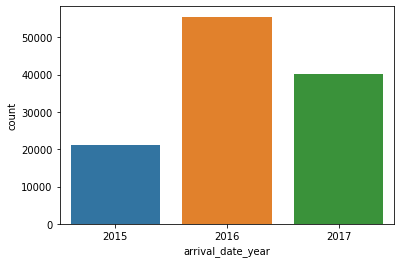

In [57]:
#Hotel Booking Demand through every year
sns.countplot('arrival_date_year',data=df)

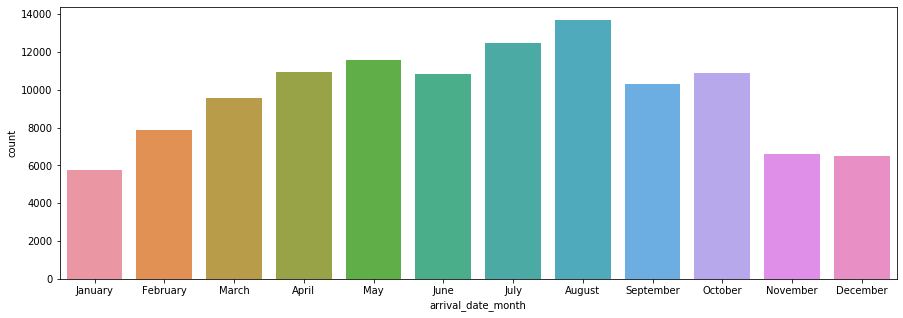

In [64]:
#Hotel Booking Demand in every month
plt.figure(figsize=(15,5))
order = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.countplot('arrival_date_month',data=df, order=order)

The booking demand increased in summer and fall time.

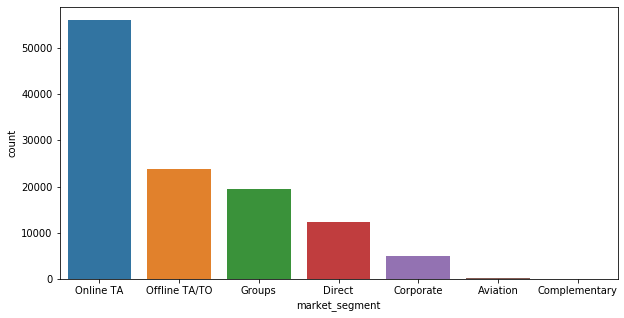

In [70]:
#Market Segment
plt.figure(figsize=(10,5))
order = df['market_segment'].value_counts().index
sns.countplot(df['market_segment'],order=order)

In [74]:
#Which are the most busy month?¶
# Create a DateFrame with the relevant data:
resort_guests_monthly = rh.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = ch.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

#show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
#How long do people stay at the hotels?
#show figure:
plt.figure(figsize=(16, 8))
sns.barplot(x = "num_nights", y = "rel_num_bookings", hue="hotel", data=nights_data,
            hue_order = ["City hotel", "Resort hotel"])
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

In [ ]:
# Create a DateFrame with the relevant data:
rh["total_nights"] = rh["stays_in_weekend_nights"] + rh["stays_in_week_nights"]
ch["total_nights"] = ch["stays_in_weekend_nights"] + ch["stays_in_week_nights"]

num_nights_res = list(rh["total_nights"].value_counts().index)
num_bookings_res = list(rh["total_nights"].value_counts())
rel_bookings_res = rh["total_nights"].value_counts() / sum(num_bookings_res) * 100 # convert to percent

num_nights_cty = list(ch["total_nights"].value_counts().index)
num_bookings_cty = list(ch["total_nights"].value_counts())
rel_bookings_cty = ch["total_nights"].value_counts() / sum(num_bookings_cty) * 100 # convert to percent

res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "rel_num_bookings": rel_bookings_res})

cty_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": num_nights_cty,
                           "rel_num_bookings": rel_bookings_cty})

nights_data = pd.concat([res_nights, cty_nights], ignore_index=True)

In [ ]:
#How many bookings were canceled?


#### 3.1. Bivariate Analysis

#### 2.4. Label Encoder

We convert categorical text features into model-understandable numerical data using LabelEncoder. For ordinal categorical features, we will label them manually to ensure correct order. 

In [21]:
#make a copy of the original dataset to avoid damaging the original data
df_copy = df.copy()

In [22]:
le = LabelEncoder()

In [23]:
#convert ordinal categorical features
df_copy['arrival_date_month'] = df_copy['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5,
                                                                   'June':6, 'July':7,'August':8, 'September':9, 'October':10, 
                                                                   'November':11, 'December':12})

In [24]:
#nominal categorical variables
categorical = ['hotel','meal','country', 'market_segment', 'distribution_channel','reserved_room_type',
       'assigned_room_type','deposit_type', 'agent','company', 'customer_type','reservation_status']

In [25]:
#convert categorical features
hotel = le.fit_transform(df_copy['hotel'])
meal = le.fit_transform(df_copy['meal'])
hotel = le.fit_transform(df_copy['hotel'])
hotel = le.fit_transform(df_copy['hotel'])
hotel = le.fit_transform(df_copy['hotel'])
hotel = le.fit_transform(df_copy['hotel'])
hotel = le.fit_transform(df_copy['hotel'])

In [26]:
df['arrival_date_month']

2           July
3           July
4           July
5           July
6           July
           ...  
119385    August
119386    August
119387    August
119388    August
119389    August
Name: arrival_date_month, Length: 116958, dtype: object

In [27]:
le.fit_transform(df_cor['arrival_date_month'])

NameError: name 'df_cor' is not defined

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.corr()